# Voice Quality Analysis: Stats Help Doc
**Author:** Jim Maddock  
**Last Updated:** 7-17-19  
**Dscription:** This notebook summarizes stats questions for the our analysis of TTS voice quality.  Generally, 1) does this analysis make sense, and 2) are there better ways to report this data? 

## Survey Questions
1) How would you rate the experience of listening to this article? (Excellent, Good, Ok, Poor, Very poor)  
2) How suitable was the speed of this reading? (Much too fast, A little fast, Just right, A little slow, Much too slow)  
3) How likely is it that you would listen to your favorite [book, magazine, podcast, etc] in this voice? (1-10)  
4) In your opinion, which of these are true? (select all that apply)
    * Voice was easy to comprehend, 
    * Voice is monotone
    * Voice sounded natural
    * Voice lacked emotion/personality
    * I could focus on the content
5) What is your Gender?  
6) Did you wear headphones?

## Study Design
we used a between subjects study design (each ppt listened to one voice).  Each condition had ~50 participants

## Notebook Setup
Load required packages, load data from file, and create factor variables

In [4]:
# load packages
require(gridExtra)
require(grid)
require(MASS)
require(ggplot2)
require(forcats)
if(!require(wesanderson)){install.packages("wesanderson")}
if(!require(EMT)){install.packages("EMT")}
if(!require(rcompanion)){install.packages("rcompanion")}

In [5]:
# load data from file
load("~/Desktop/Rdata")
data = data[, -c(1:21, 24, 34, 37, 48, 55, 63)]
colnames(data) = c("MID", "audio.paused", "page.seconds", "rate.experience", "rate.speed", "rate.again",
                   "voice.easy", "voice.monotone", "voice.natural", "voice.no_emotion", "voice.focus",
                   "voice.all", "voice.none", "voice.other",
                   "check1", "check2", "check3", "check4", "check5", "check6", "check7", 
                   "age", "gender",
                   "race.asian", "race.hawaiian", "race.aa", "race.cc", "race.latin", "race.indian", "race.other",
                   "income", "state", "device", "device.other", "headphones", "voice")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)

In [6]:
# create factors
data$gender = factor(data$gender, levels = c("", "Man" , "These don't describe me",   "Woman"),
              labels = c("NA", "Male", "Other", "Female"))
data$grade = round(rowMeans(data[, 15:21], na.rm = TRUE),2)*10

data$rate.speed = ordered(data$rate.speed, levels = c("Much too fast", "Too fast", "Just right",
                                                      "Too slow", "Much too slow"))
                          
data$rate.experience = ordered(data$rate.experience, levels = c("Excellent", "Good", "OK", "Poor", "Very poor"))
            

                            

In [7]:
# create collapsed factors
data$rate.experience.simple = data$rate.experience
levels(data$rate.experience.simple) = c('Good','Good','OK','Poor','Poor')

data$rate.speed.simple = data$rate.speed
levels(data$rate.speed.simple) = c('Too fast','Too fast','Just right','Too slow','Too slow')

In [8]:
# all TTS voices
group_names.voice = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

# only controls (human, text), Mozilla TTS, and Amazon Polly
group_names.voice.polly_vs_deep = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = "")
)

group_names.voice.type = c(
  "MozillaTTS:LJSpeech" = "Mozilla TTS",
  "Mozilla TTS:Nancy" = "Mozilla TTS",
  "Mozilla TTS:Nancy2" = "Mozilla TTS",
  "Judy Wave2" = "Mozilla TTS",
  "Judy Wave1" = "Mozilla TTS",
  "Judy GL2" = "Mozilla TTS",
  "Judy GL1" = "Mozilla TTS",
  "Polly Joana" = "Amazon Polly",
  "Polly Matthew" = "Amazon Polly",
  "Polly Sally" = "Amazon Polly",
  ".Jofish" = "Human",
  ".Janice" = "Human",
  ".Abe" = "Human",
  "Text only" = "Text"
)

# gender categories
group_names.gender = c(
  "Male" = paste("Male (", nrow(data[data$gender == "Male",]) ,")"),
  "Female" = paste("Female (", nrow(data[data$gender == "Female",]) ,")")
)

# headphones (y/n)
group_names.headphone = c(
  "No" = paste("No headphones (", nrow(data[data$headphones == "No",]) ,")"),
  "Yes" = paste("Headphones (", nrow(data[data$headphones == "Yes",]) ,")")
)

## Summary Stats

In [9]:
# number of participants
print(paste("Number of participants:", nrow(data)), quote=FALSE)
# number of voices
print(paste("Number of voices:", length(unique(data$voice))), quote=FALSE)

[1] Number of participants: 1090
[1] Number of voices: 22


In [10]:
# number of ppts per voice
as.data.frame(table(data$voice))

Var1,Freq
<fct>,<int>
.Abe,49
.Janice,49
.Jofish,55
Android UK Male,48
Google A,51
Google C,47
iOS Female,51
Judy GL1,56
Judy GL2,50


# Stats Questions
## Summarizing and testing ordinal data (Survey Question 1)
What's the best way to tell which voices participants prefered?  We can get the percentage of users in each condition who selected a certain rating (Good, OK, Poor).  Graphed, those percentages look like this:

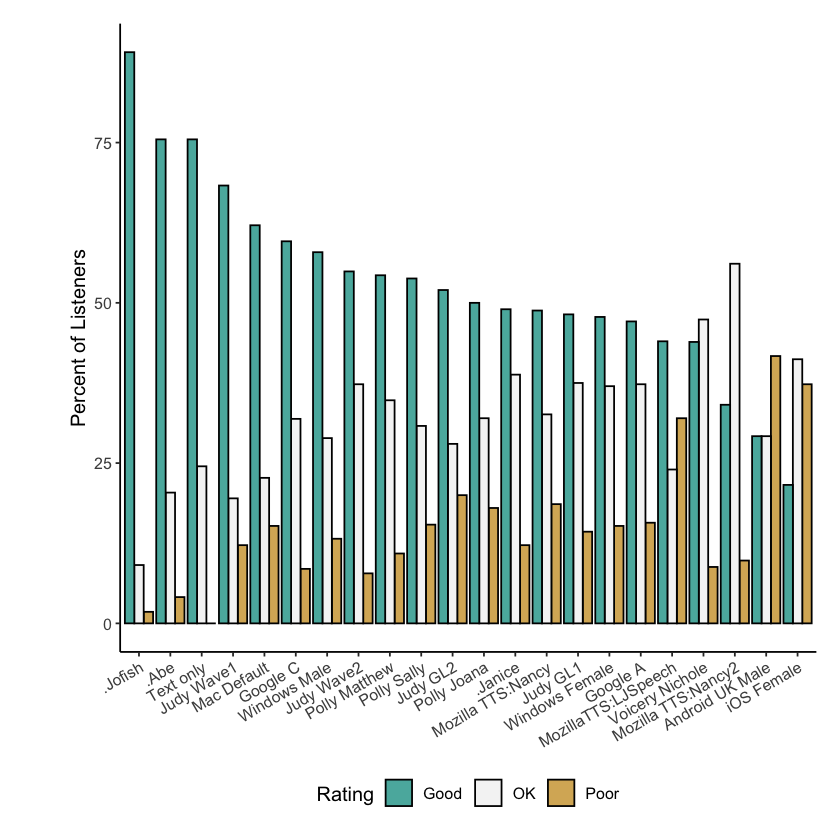

In [12]:
## Rate experience ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple), margin = 1), digits = 3)*100)
temp = subset(temp, Var1 %in% names(group_names.voice))
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$Freq),]
rank$rank = rank(rank$Freq)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = Freq, fill = Var2, 
                 label = Freq)) +
  geom_bar(stat="identity", color = "black", position=position_dodge()) + 
  labs(y = "Percent of Listeners") +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

From this graph we can see that Jofish recieved the highest percentage of "good" ratings and iOS female recieved the lowest percentage of "good" ratings.  Jofish also recieved the lowest percentage of "poor" ratings, but Android UK Male (not iOS) recieved the highest percentage of "poor" ratings.

**Is there a better way to report/summarize this data?**

We can also test whether users provided signifigantly different ratings based on the voice they listened to.  I used a Kruskal-Wallis rank sum test because the data is ordinal and we're testing more than 2 voice conditions.

**Is this the correct test to use here?**

In [22]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice))
kruskal.test(rate.experience.simple ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.experience.simple by voice
Kruskal-Wallis chi-squared = 112.81, df = 21, p-value = 1.465e-14


## Summarizing and reporting survey question 3
We can look at the median values of how likely participants said they would be willing to listen to a particular voice again:

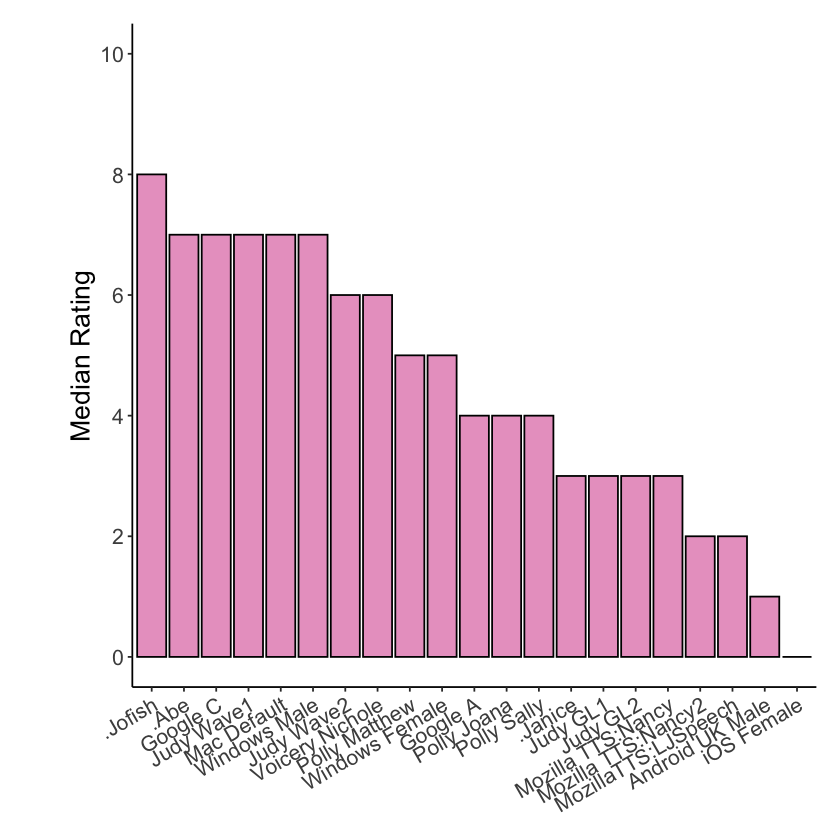

In [15]:
temp = data
temp = aggregate(rate.again ~ voice, data=temp, FUN = "median")
temp = subset(temp, voice %in% names(group_names.voice))
#temp = merge(temp,group_names.voice.type,by.x='voice',by.y=0)

ggplot(temp, aes(x = reorder(voice,-rate.again), y = rate.again, fill="",
                 label = voice)) +
  geom_bar(stat="identity", color = "black") + 
  theme_classic() +
  labs(y = "Median Rating") +
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "none") +
        guides(fill = guide_legend(title = "Voice Type")) +
  scale_fill_brewer(palette = "PiYG", direction = -1) +
  scale_y_continuous(limits=c(0,10),breaks=seq(0,10,2)) 

As in the previous analysis, we can also test whether users provided signifigantly different ratings based on the voice they listened to.  I used a Kruskal-Wallis rank sum test again because the data is ordinal and we're testing more than 2 voice conditions.

**Are there better ways to report this data?**

In [16]:
# perform Kruskal-Wallis rank sum test to determine statistical difference between speed ratings
temp = subset(data, voice %in% names(group_names.voice))
kruskal.test(rate.again ~ voice, data = temp)


	Kruskal-Wallis rank sum test

data:  rate.again by voice
Kruskal-Wallis chi-squared = 142.14, df = 20, p-value < 2.2e-16


## What role does gender play in voice ratings?
We can test whether male and female users provided different ratings in general fairly easily. Since we're comparing 2 groups I used a wilcox ranked sum test.  This tells us whether Male and Female participants in general provided more of a specific type of rating:

In [17]:
# perform wilcox ranked sum test on rating differences by gender
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice))
wilcox.test(as.numeric(rate.experience) ~ gender, data=temp)


	Wilcoxon rank sum test with continuity correction

data:  as.numeric(rate.experience) by gender
W = 145882, p-value = 0.2072
alternative hypothesis: true location shift is not equal to 0


But what if we want to know whether participants of different genders provide diffent ratings conditional on voice?  My first intuition was to model this with something like:

rating ~ voice + gender + voice * gender

But this gets pretty challenging to interpret.  Since the question is ordinal I *think* we need to use an ordinal logistic regression, but we end up with a different coefficient and pvalue for each condition.

**Is there a better/easier way to answer this question?**

In [18]:
temp = subset(data, gender %in% names(group_names.gender) & voice %in% names(group_names.voice))
m = polr(formula = rate.experience.simple ~ gender + voice + headphones + gender*voice, data = temp, Hess = TRUE)


## store table
ctable <- coef(summary(m))
ctable

Warning message in polr(formula = rate.experience.simple ~ gender + voice + headphones + :
“design appears to be rank-deficient, so dropping some coefs”

,Value,Std. Error,t value
genderMale,1.1105586,0.8494972,1.3073128
voice.Janice,1.4631684,0.9053235,1.6161829
voice.Jofish,-1.2850158,1.2676006,-1.0137387
voiceAndroid UK Male,2.6451626,0.8815860,3.0004590
voiceGoogle A,2.1889708,0.8868412,2.4682782
voiceGoogle C,1.2196111,0.8951565,1.3624558
voiceiOS Female,3.8080053,0.8570041,4.4433921
voiceJudy GL1,1.8157602,0.8442194,2.1508156
voiceJudy GL2,1.9043279,0.8388815,2.2700798
voiceJudy Wave1,1.1738979,0.8955500,1.3108122


We can also look at the difference in the percentage of female vs male participants who gave a specific rating, but I'm not sure this difference is actually meaningful or how to report this data:

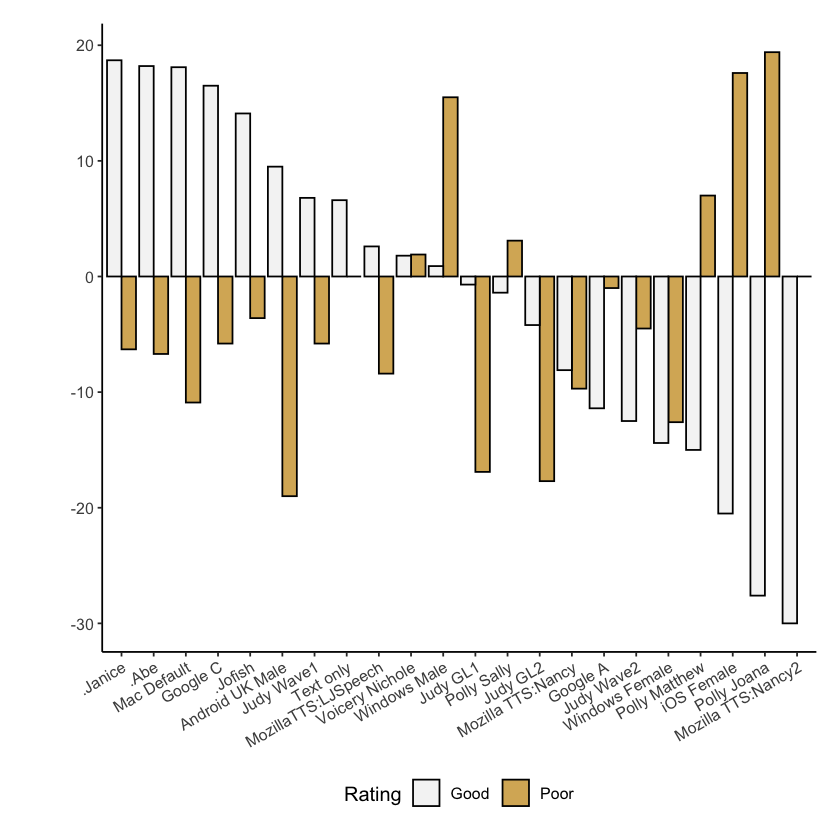

In [19]:
# broken down by gender ----
temp = as.data.frame(round(prop.table(table(data$voice, data$rate.experience.simple, data$gender), c(3,1)), digits = 3)*100)
temp = subset(temp, Var3 %in% names(group_names.gender) & Var1 %in% names(group_names.voice) & Var2 %in% c("Good","Poor"))
f = subset(temp, Var3 == "Female")
m = subset(temp, Var3 == "Male")
temp = merge(f, m, by = c("Var1","Var2"))
temp$diff = temp$Freq.x - temp$Freq.y
rank = subset(temp, Var2 == "Good")
rank = rank[order(-rank$diff),]
rank$rank = rank(rank$diff)
temp = merge(temp,rank[c("Var1","rank")],by="Var1")

ggplot(temp, aes(x = reorder(Var1,-rank), y = diff, fill = Var2)) +
  geom_bar(stat="identity", color = "black", position = position_dodge()) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        axis.title.y = element_blank(),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "bottom") +
  guides(fill = guide_legend(title = "Rating")) +
  scale_fill_brewer(palette = "BrBG", direction = -1)

ggsave("/Users/jmaddock/data/voice_comparison/img/gender_7-15-19.png",height=4,width=10)

## Summarizing and reporting survey question 5
We can make a big table of the percentage of participants who agreed with a specific statement, but this is pretty unwieldy and it doesn't tell us if there are meaningful difference between voice conditions:

In [21]:
options(repr.matrix.max.cols=50)
temp = subset(data, voice %in% names(group_names.voice))

voice.easy = as.data.frame.matrix(round(table(temp$voice, temp$voice.easy)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.monotone = as.data.frame.matrix(round(table(temp$voice, temp$voice.monotone)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.natural = as.data.frame.matrix(round(table(temp$voice, temp$voice.natural)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.no_emotion = as.data.frame.matrix(round(table(temp$voice, temp$voice.no_emotion)/(as.vector(t(table(temp$voice)))), digits = 3)*100)
voice.focus = as.data.frame.matrix(round(table(temp$voice, temp$voice.focus)/(as.vector(t(table(temp$voice)))), digits = 3)*100)

result = data.frame(voice.easy,voice=rownames(voice.easy))
result = merge(result, data.frame(voice.monotone,voice = rownames(voice.monotone)), by="voice")
result = merge(result, data.frame(voice.natural,voice = rownames(voice.natural)), by="voice")
result = merge(result, data.frame(voice.no_emotion,voice = rownames(voice.no_emotion)), by="voice")
result = merge(result, data.frame(voice.focus,voice = rownames(voice.focus)), by="voice")
result = subset(result, voice %in% names(group_names.voice))
result

voice,Voice.was.easy.to.comprehend.,Voice.is.monotone.,Voice.sounded.natural.,Voice.lacked.emotion.personality.,I.could.focus.on.the.content.
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
.Abe,73.5,36.7,57.1,32.7,61.2
.Janice,57.1,16.3,67.3,22.4,59.2
.Jofish,83.6,14.5,74.5,9.1,72.7
Android UK Male,22.9,75.0,12.5,72.9,27.1
Google A,49.0,52.9,19.6,52.9,45.1
Google C,55.3,48.9,21.3,53.2,55.3
iOS Female,27.5,88.2,2.0,82.4,25.5
Judy GL1,50.0,64.3,26.8,71.4,44.6
Judy GL2,42.0,66.0,12.0,70.0,54.0
